# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [3]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True

# Change quad bounds
meas.config_dict['meas_pv_info']['meas_device']['bounds'] = [-6, 8]

# Change settle time
meas.config_dict['meas_pv_info']['meas_device']['settle_time'] = 0.1

meas.config_dict


{'beamline_info': {'name': 'LCLS2',
  'species': 'electron',
  'Lquad': 0.1244,
  'energy': 80000000.0,
  'Twiss0': [1e-06, 1e-06, 5.01, 5.01, 0.049, 0.049],
  'rMatx': [1, 2.2, 0, 1],
  'rMaty': [1, 2.2, 0, 1]},
 'img_proc': {'subtract_bg': False,
  'use_roi': False,
  'avg_ims': True,
  'n_to_acquire': 1,
  'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
  'amp_threshold': 150,
  'min_sigma': 3,
  'max_sigma': 700,
  'max_samples': 1,
  'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}},
 'meas_pv_info': {'diagnostic': {'pv': {'name': 'OTRS:HTR:330',
    'image': 'OTRS:HTR:330:Image:ArrayData',
    'nrow': 'OTRS:HTR:330:Image:ArraySize1_RBV',
    'ncol': 'OTRS:HTR:330:Image:ArraySize0_RBV',
    'resolution': 'OTRS:HTR:330:RESOLUTION',
    'xsize': 'OTRS:HTR:330:XRMS',
    'ysize': 'OTRS:HTR:330:YRMS'}},
  'meas_device': {'settle_time': 0.1,
   'bounds': [-6, 8],
   'pv': {'name': 'QUAD:HTR:120',
    'cntrl': 'QUAD:HTR:120:BCTRL',
   

In [4]:
# Convenience methods.
meas.quad_init, meas.quad_bounds

([-6, -4, -2, 0], [-6, 8])

In [5]:
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'savepaths'])

In [6]:
meas.config_dict['meas_pv_info']['meas_device']

{'settle_time': 0.1,
 'bounds': [-6, 8],
 'pv': {'name': 'QUAD:HTR:120',
  'cntrl': 'QUAD:HTR:120:BCTRL',
  'read': 'QUAD:HTR:120:BACT'}}

In [7]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-08-28 01:36:33,868 | INFO : Running online!
2023-08-28 01:36:33,917 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-08-28 01:36:33,945 | INFO : Settling for 0.1 s...
2023-08-28 01:36:34,963 | INFO : 2023-08-28_01-36-34-963867
2023-08-28 01:36:35,178 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-08-28 01:36:35,180 | INFO : Settling for 0.1 s...
2023-08-28 01:36:35,670 | INFO : 2023-08-28_01-36-35-670477
2023-08-28 01:36:35,821 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-08-28 01:36:35,822 | INFO : Settling for 0.1 s...
2023-08-28 01:36:36,325 | INFO : 2023-08-28_01-36-36-325273
2023-08-28 01:36:36,457 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-08-28 01:36:36,459 | INFO : Settling for 0.1 s...
2023-08-28 01:36:36,903 | INFO : 2023-08-28_01-36-36-903150
2023-08-28 01:36:37,038 | INFO : Adapting ranges
2023-08-28 01:36:37,040 | INFO : Adapting ranges for x beam size measurement: [-0.7332507599154842, -0.1943756332629034, 0.34449949338967734, 0.883374620042258, 1.422249746694

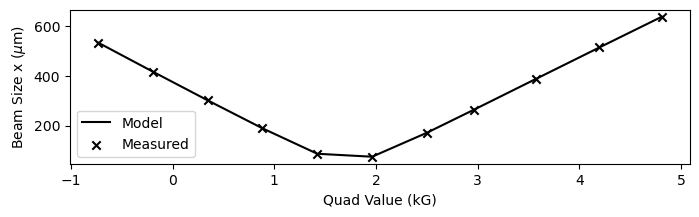

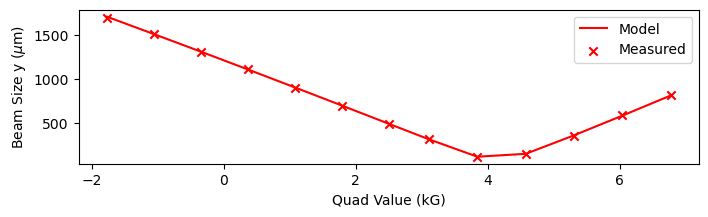

In [8]:
result = meas.measure_emittance()

# Examine results

In [9]:
import matplotlib.pyplot as plt

In [10]:
result

{'quadvalsx': array([-0.73325076, -0.19437563,  0.34449949,  0.88337462,  1.42224975,
         1.96112487,  2.5       ,  2.96189297,  3.57775025,  4.19360754,
         4.80946483]),
 'beamsizesx': array([5.30669701e-04, 4.16529349e-04, 3.02447902e-04, 1.88725933e-04,
        8.67880207e-05, 7.49204269e-05, 1.70535720e-04, 2.64482195e-04,
        3.88012512e-04, 5.14672236e-04, 6.37204151e-04]),
 'beamsizeserrx': array([0.03232671, 0.02454762, 0.01151363, 0.00631758, 0.00172789,
        0.00162318, 0.00564142, 0.0094879 , 0.01958493, 0.03025297,
        0.04030609]),
 'error_x': False,
 'emit_x': 6.455155468940672e-09,
 'norm_emit_x': 1.0105733144794533e-06,
 'beta_x': 9.884991664691047,
 'alpha_x': -1.9764682514857934,
 'emit_x_err': 1.856990887145974e-07,
 'norm_emit_x_err': 2.9071731034376036e-05,
 'beta_x_rel_err': 28.76756254874085,
 'alpha_x_rel_err': -1.7677989091920645e-15,
 'sigma_11': 6.380915800476337e-08,
 'sigma_12': 1.2758409842766127e-08,
 'sigma_22': 3.2040236893413367e-

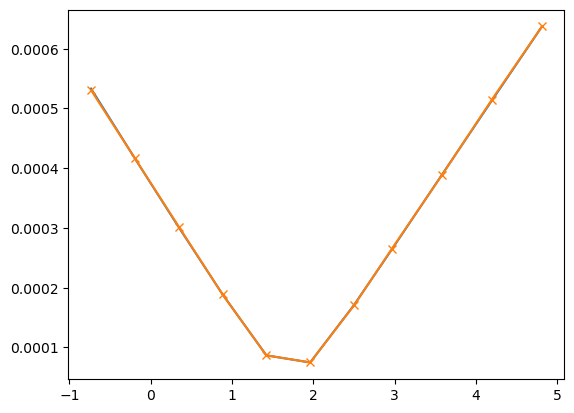

In [11]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

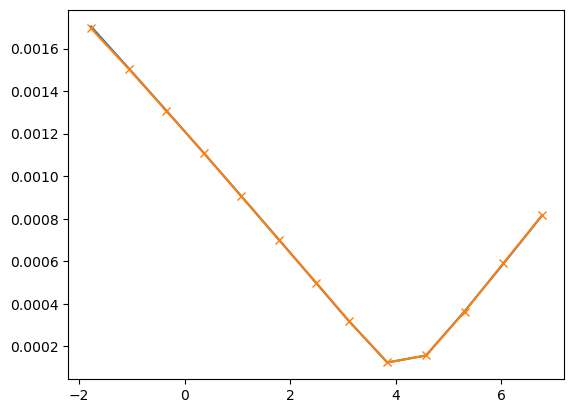

In [12]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


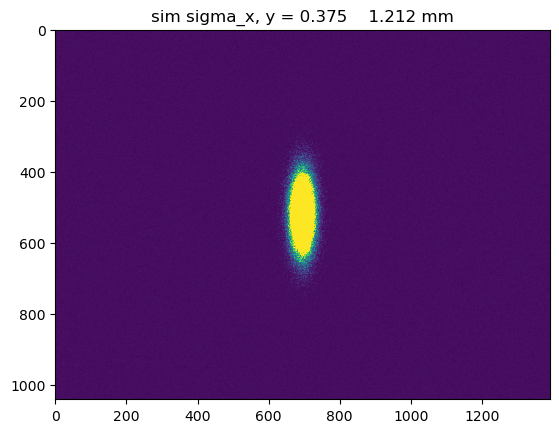

In [13]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)